In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/My Drive/cls-acl10-unprocessed.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

# Verify extraction
!ls /content/dataset/cls-acl10-unprocessed/en/books


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test.review  train.review  unlabeled.review


In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

def parse_review(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    reviews = []

    for item in root.findall('item'):
        rating = float(item.find('rating').text)  # Convert rating to float
        text = item.find('text').text
        label = 1 if rating > 3.0 else 0  # Positive if rating > 3.0, otherwise negative
        reviews.append({'text': text, 'label': label})

    return pd.DataFrame(reviews)

# Load the English books reviews
train_df = parse_review('/content/dataset/cls-acl10-unprocessed/en/books/train.review')
test_df = parse_review('/content/dataset/cls-acl10-unprocessed/en/books/test.review')

# Display the first few rows
train_df.head()


,text,label
0,While I realize that the majority of people th...,0
1,I had never read any of Vernor Vinges books b...,0
2,I got this as both a book and an audio file. ...,0
3,"The content of this book is adequate, but the ...",0
4,This book can be very damaging if you approach...,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.7575
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       198
           1       0.75      0.77      0.76       202

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



In [5]:
import os
import pandas as pd

def read_reviews_from_directory(directory):
    reviews = {'text': [], 'rating': []}
    for file_name in ['train.review', 'test.review', 'unlabeled.review']:
        file_path = os.path.join(directory, file_name)
        if os.path.exists(file_path):
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    # XML parsing logic
                    start_text = line.find('<text>') + len('<text>')
                    end_text = line.find('</text>')
                    text = line[start_text:end_text].strip()
                    start_rating = line.find('<rating>') + len('<rating>')
                    end_rating = line.find('</rating>')
                    rating = int(line[start_rating:end_rating].strip())

                    reviews['text'].append(text)
                    reviews['rating'].append(rating)

    return pd.DataFrame(reviews)

# Load the English dataset
data_directory = '/content/dataset/cls-acl10-unprocessed/en'
reviews_df = read_reviews_from_directory(data_directory)

# Check the loaded data
reviews_df.head()


,text,rating


In [6]:
import pandas as pd

# Define file path
file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'

# Try reading the file with different methods

# Method 1: Attempt to read as CSV with default delimiter (comma)
try:
    reviews_df = pd.read_csv(file_path)
    print("File loaded successfully as CSV")
except pd.errors.ParserError:
    print("Error reading as CSV")

# Check the first few rows to understand the data structure
print("First few rows of data:")
print(reviews_df.head())

# Method 2: If CSV fails, try tab-separated values (TSV)
try:
    reviews_df = pd.read_csv(file_path, delimiter='\t')
    print("File loaded successfully as TSV")
except pd.errors.ParserError:
    print("Error reading as TSV")

# Check the first few rows to understand the data structure
print("First few rows of data:")
print(reviews_df.head())

# Method 3: If TSV fails, try custom delimiter (e.g., '|')
try:
    reviews_df = pd.read_csv(file_path, delimiter='|')
    print("File loaded successfully with custom delimiter '|'")
except pd.errors.ParserError:
    print("Error reading with custom delimiter")

# Check the first few rows to understand the data structure
print("First few rows of data:")
print(reviews_df.head())

# Method 4: If all else fails, read as plain text and inspect manually
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    print("File read as plain text")
    print("First few lines of data:")
    for line in lines[:10]:
        print(line)
except Exception as e:
    print(f"Error reading file: {e}")

# After loading the file successfully, proceed with data analysis
# For example, checking the data types and columns
if 'reviews_df' in locals():
    print("Data columns:")
    print(reviews_df.columns)
    print("Data types:")
    print(reviews_df.dtypes)



Error reading as CSV
First few rows of data:
Empty DataFrame
Columns: [text, rating]
Index: []
Error reading as TSV
First few rows of data:
Empty DataFrame
Columns: [text, rating]
Index: []
File loaded successfully with custom delimiter '|'
First few rows of data:
              <?xml version="1.0" encoding="utf-8"?>
0                                      <items><item>
1      \t<summary>Insert pun with word "con" here...
2                                         </summary>
3                             \t<rating>2.0</rating>
4  \t<text>"Con Express" has lots of action in it...
File read as plain text
First few lines of data:
<?xml version="1.0" encoding="utf-8"?>

<items><item>

	<summary>Insert pun with word "con" here...

</summary>

	<rating>2.0</rating>

	<text>"Con Express" has lots of action in it, which is great because this hides the poor writing and uninteresting characters. Unfortunately, the action isn't enough, and in between stunt pieces and shoot-outs, the audience is temp

DataFrame created successfully:
                                                text rating sentiment
0  "Con Express" has lots of action in it, which ...    2.0  negative
1  It is obvious that this movie is full of lies....    1.0  negative
2  I don't want to spoil this movie for others an...    1.0  negative
3  If there is one thing Michael Bay is good at, ...    1.0  negative
4  About the only thing this movie has going for ...    2.0  negative
Number of rows in DataFrame: 2000
Columns in DataFrame: Index(['text', 'rating', 'sentiment'], dtype='object')
Sentiment distribution:
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


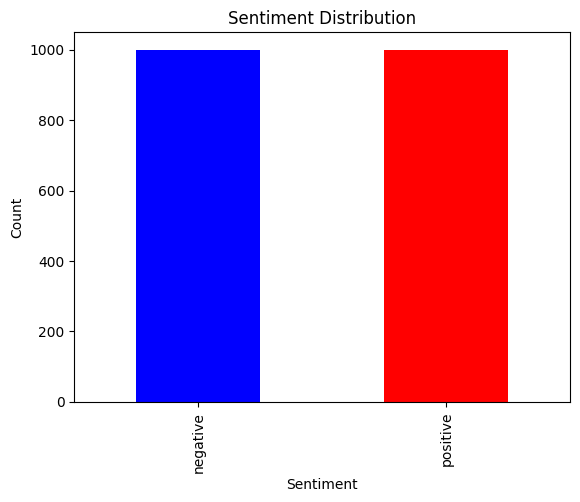

In [7]:
import xml.etree.ElementTree as ET
import pandas as pd
import re

# Load and read the plain text file
file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
with open(file_path, 'r') as file:
    xml_content = file.read()

# Remove XML declaration if present
xml_content = re.sub(r'^<\?xml.*\?>', '', xml_content).strip()

# Wrap the content with a root element
xml_content = f"<root>{xml_content}</root>"

# Parse the XML content
try:
    root = ET.fromstring(xml_content)
except ET.ParseError as e:
    print(f"XML Parse Error: {e}")
    root = None

# Extract data
data = []
if root is not None:
    for item in root.findall(".//item"):
        text = item.find("text").text.strip() if item.find("text") is not None else ""
        rating = item.find("rating").text.strip() if item.find("rating") is not None else ""
        sentiment = "positive" if float(rating) > 3.0 else "negative"  # Simple sentiment classification based on rating
        data.append({'text': text, 'rating': rating, 'sentiment': sentiment})

# Convert to DataFrame
reviews_df = pd.DataFrame(data)

# Display the DataFrame
print("DataFrame created successfully:")
print(reviews_df.head())

# Check for empty DataFrame
if reviews_df.empty:
    print("DataFrame is empty.")
else:
    print(f"Number of rows in DataFrame: {len(reviews_df)}")
    print(f"Columns in DataFrame: {reviews_df.columns}")

# Check sentiment distribution
sentiment_counts = reviews_df['sentiment'].value_counts()
print("Sentiment distribution:")
print(sentiment_counts)

# Plot sentiment distribution (optional)
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [8]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
import re

# Function to parse XML data
def parse_xml(file_path):
    reviews = []
    tree = ET.parse(file_path)
    root = tree.getroot()
    for item in root.findall('item'):
        text = item.find('text').text if item.find('text') is not None else ''
        sentiment = item.find('category').text if item.find('category') is not None else ''
        reviews.append((text, sentiment))
    return reviews

# Load and preprocess data
def load_data(language, category):
    train_file = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
    test_file = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.review'
    unlabeled_file = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/unlabeled.review'

    train_reviews = parse_xml(train_file)
    test_reviews = parse_xml(test_file)
    unlabeled_reviews = parse_xml(unlabeled_file)

    train_df = pd.DataFrame(train_reviews, columns=['text', 'sentiment'])
    test_df = pd.DataFrame(test_reviews, columns=['text', 'sentiment'])
    unlabeled_df = pd.DataFrame(unlabeled_reviews, columns=['text', 'sentiment'])

    return train_df, test_df, unlabeled_df

# Preprocess text data
def preprocess_text(texts):
    cleaned_texts = []
    for text in texts:
        if isinstance(text, str):
            text = re.sub(r'<[^>]+>', '', text)  # Remove XML tags
            text = text.strip()  # Remove leading/trailing whitespace
        else:
            text = ''  # Convert None to empty string
        cleaned_texts.append(text)
    return cleaned_texts

# Tokenize and pad sequences
def tokenize_and_pad(train_texts, test_texts, max_len=100):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_texts)

    X_train_seq = tokenizer.texts_to_sequences(train_texts)
    X_test_seq = tokenizer.texts_to_sequences(test_texts)

    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

    return X_train_pad, X_test_pad, tokenizer

# Convert labels to numeric values
def labels_to_numeric(labels):
    return [1 if label == 'positive' else 0 for label in labels]

# Build LSTM model
def build_lstm_model(vocab_size, max_len):
    model = Sequential()
    model.add(Embedding(vocab_size, 128, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Main process for German language
language = 'de'  # German language
category = 'dvd'  # Example: DVDs

train_df, test_df, unlabeled_df = load_data(language, category)

train_texts = preprocess_text(train_df['text'].tolist())
test_texts = preprocess_text(test_df['text'].tolist())
unlabeled_texts = preprocess_text(unlabeled_df['text'].tolist())

X_train_pad, X_test_pad, tokenizer = tokenize_and_pad(train_texts, test_texts)
y_train = np.array(labels_to_numeric(train_df['sentiment']))
y_test = np.array(labels_to_numeric(test_df['sentiment']))

vocab_size = len(tokenizer.word_index) + 1
max_len = X_train_pad.shape[1]

model = build_lstm_model(vocab_size, max_len)
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_labels = [1 if p > 0.5 else 0 for p in y_pred]

# Ensure both classes are present in the labels
labels = np.unique(y_test)

# Print classification report
print(classification_report(y_test, y_pred_labels, target_names=['negative', 'positive'], labels=labels))

# Predict on unlabeled data
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_texts)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)
unlabeled_pred = model.predict(X_unlabeled_pad)
unlabeled_pred_labels = ['positive' if p > 0.5 else 'negative' for p in unlabeled_pred]

# Add predictions to DataFrame
unlabeled_df['predicted_sentiment'] = unlabeled_pred_labels
print(unlabeled_df.head())


Epoch 1/5
29/29 [==============================] - 18s 453ms/step - loss: 0.1725 - accuracy: 0.9822 - val_loss: 1.3496e-04 - val_accuracy: 1.0000
Epoch 2/5
29/29 [==============================] - 10s 357ms/step - loss: 8.1209e-05 - accuracy: 1.0000 - val_loss: 5.8939e-05 - val_accuracy: 1.0000
Epoch 3/5
29/29 [==============================] - 12s 421ms/step - loss: 5.3816e-05 - accuracy: 1.0000 - val_loss: 4.9339e-05 - val_accuracy: 1.0000
Epoch 4/5
29/29 [==============================] - 16s 552ms/step - loss: 4.6045e-05 - accuracy: 1.0000 - val_loss: 4.2278e-05 - val_accuracy: 1.0000
Epoch 5/5
63/63 [==============================] - 7s 98ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 1, does not match size of target_names, 2
  warnings.warn(


2860/2860 [==============================] - 228s 80ms/step
                                                text          sentiment  \
0  X MEN ORIGINS : WOLVERINE präsentiert uns die ...  DVD &amp; Blu-ray   
1  Komme gerade aus dem Kino. Großartiger Film.\n...  DVD &amp; Blu-ray   
2  Für mich und meine Lebensgefährtin war der Fil...  DVD &amp; Blu-ray   
3  Ich finde das der Film an sich schon sehenswer...  DVD &amp; Blu-ray   
4  Illuminati gehört für  mich ganz klar zu eines...  DVD &amp; Blu-ray   

  predicted_sentiment  
0            negative  
1            negative  
2            negative  
3            negative  
4            negative  


In [9]:
# Count the number of each sentiment in the 'predicted_sentiment' column
sentiment_counts = unlabeled_df['predicted_sentiment'].value_counts()
print(sentiment_counts)


predicted_sentiment
negative    91516
Name: count, dtype: int64


In [10]:
!head -n 10 /content/dataset/cls-acl10-unprocessed/en/dvd/train.review

<?xml version="1.0" encoding="utf-8"?>
<items><item>
	<summary>Insert pun with word "con" here...
</summary>
	<rating>2.0</rating>
	<text>"Con Express" has lots of action in it, which is great because this hides the poor writing and uninteresting characters. Unfortunately, the action isn't enough, and in between stunt pieces and shoot-outs, the audience is tempted to doze off. City Heat Productions isn't really known for producing films of the highest quality, so usually I go easy on them. If this were a big-budget company producing this, I'd be inclined to pan it entirely. But I wasn't expecting much and got a little more than I bargained for. The action is, for the most part, pretty good but nothing competitive with your usual dumb action movie. Flanery and Vosloo are perfectly casted, but everyone else seems to stiff to add any more flow to the movie. Vosloo especially appears to be enjoying himself as an over-the-top bad guy hijacking a train containing deadly chemicals. The film m

In [11]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for review in root.findall('review'):
        sentiment = review.get('polarity')
        text = review.find('text').text
        data.append((text, sentiment))

    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    return df

train_df = parse_xml('/content/dataset/cls-acl10-unprocessed/en/dvd/train.review')
test_df = parse_xml('/content/dataset/cls-acl10-unprocessed/en/dvd/test.review')
unlabeled_df = parse_xml('/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review')

print("Train Data Head:\n", train_df.head())
print("Test Data Head:\n", test_df.head())
print("Unlabeled Data Head:\n", unlabeled_df.head())
print("Train Data Info:\n", train_df.info())


Train Data Head:
 Empty DataFrame
Columns: [text, sentiment]
Index: []
Test Data Head:
 Empty DataFrame
Columns: [text, sentiment]
Index: []
Unlabeled Data Head:
 Empty DataFrame
Columns: [text, sentiment]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       0 non-null      object
 1   sentiment  0 non-null      object
dtypes: object(2)
memory usage: 124.0+ bytes
Train Data Info:
 None


In [12]:
train_df['sentiment'] = train_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
test_df['sentiment'] = test_df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

print("Converted Train Sentiments:\n", train_df['sentiment'].value_counts())
print("Converted Test Sentiments:\n", test_df['sentiment'].value_counts())


Converted Train Sentiments:
 Series([], Name: count, dtype: int64)
Converted Test Sentiments:
 Series([], Name: count, dtype: int64)


In [13]:
def preprocess_text(texts):
    # Add your text preprocessing steps here
    return [text.lower() for text in texts if text is not None]

train_texts = preprocess_text(train_df['text'].tolist())
test_texts = preprocess_text(test_df['text'].tolist())
unlabeled_texts = preprocess_text(unlabeled_df['text'].tolist())

print("Preprocessed Train Texts:", train_texts[:5])
print("Preprocessed Test Texts:", test_texts[:5])
print("Preprocessed Unlabeled Texts:", unlabeled_texts[:5])


Preprocessed Train Texts: []
Preprocessed Test Texts: []
Preprocessed Unlabeled Texts: []


In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_texts)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)

print("Padded Train Sequences Shape:", X_train_pad.shape)
print("Padded Test Sequences Shape:", X_test_pad.shape)
print("Padded Unlabeled Sequences Shape:", X_unlabeled_pad.shape)


Padded Train Sequences Shape: (0, 200)
Padded Test Sequences Shape: (0, 200)
Padded Unlabeled Sequences Shape: (0, 200)


In [15]:
y_train = train_df['sentiment'].values
y_test = test_df['sentiment'].values

print("Train Labels:", y_train[:5])
print("Test Labels:", y_test[:5])
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Train Labels: []
Test Labels: []
Train Labels Shape: (0,)
Test Labels Shape: (0,)


In [16]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

if len(y_train) > 0 and len(X_train_pad) > 0:
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

    # Evaluate the model
    y_pred = model.predict(X_test_pad)
    y_pred_labels = (y_pred > 0.5).astype(int)

    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred_labels, target_names=['negative', 'positive']))

    # Predict on unlabeled data
    unlabeled_pred = model.predict(X_unlabeled_pad)
    unlabeled_pred_labels = (unlabeled_pred > 0.5).astype(int)

    unlabeled_df['predicted_sentiment'] = ['positive' if label == 1 else 'negative' for label in unlabeled_pred_labels]
    print(unlabeled_df['predicted_sentiment'].value_counts())
else:
    print("Training data is empty. Please check the data preprocessing steps.")


Training data is empty. Please check the data preprocessing steps.


In [17]:
import xml.etree.ElementTree as ET

def print_xml_file_content(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    for review in root.findall('review')[:5]:  # Print the first 5 reviews
        sentiment = review.get('polarity')
        text = review.find('text').text
        print(f'Sentiment: {sentiment}, Text: {text[:100]}...')  # Print only the first 100 characters of the text

print("Train Review Content:")
print_xml_file_content('/content/dataset/cls-acl10-unprocessed/en/dvd/train.review')

print("Test Review Content:")
print_xml_file_content('/content/dataset/cls-acl10-unprocessed/en/dvd/test.review')

print("Unlabeled Review Content:")
print_xml_file_content('/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review')


Train Review Content:
Test Review Content:
Unlabeled Review Content:


In [18]:
def print_raw_xml_content(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        print(content[:1000])  # Print the first 1000 characters

print("Raw Content of Train Review File:")
print_raw_xml_content('/content/dataset/cls-acl10-unprocessed/en/dvd/train.review')

print("Raw Content of Test Review File:")
print_raw_xml_content('/content/dataset/cls-acl10-unprocessed/en/dvd/test.review')

print("Raw Content of Unlabeled Review File:")
print_raw_xml_content('/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review')


Raw Content of Train Review File:
<?xml version="1.0" encoding="utf-8"?>
<items><item>
	<summary>Insert pun with word "con" here...
</summary>
	<rating>2.0</rating>
	<text>"Con Express" has lots of action in it, which is great because this hides the poor writing and uninteresting characters. Unfortunately, the action isn't enough, and in between stunt pieces and shoot-outs, the audience is tempted to doze off. City Heat Productions isn't really known for producing films of the highest quality, so usually I go easy on them. If this were a big-budget company producing this, I'd be inclined to pan it entirely. But I wasn't expecting much and got a little more than I bargained for. The action is, for the most part, pretty good but nothing competitive with your usual dumb action movie. Flanery and Vosloo are perfectly casted, but everyone else seems to stiff to add any more flow to the movie. Vosloo especially appears to be enjoying himself as an over-the-top bad guy hijacking a train conta

In [19]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for review in root.findall('review'):
        sentiment = review.get('polarity')
        text = review.find('text').text
        if text is not None:  # Ensure text is not None
            data.append((text, sentiment))

    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    return df

# Define file paths
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())

print("Test DataFrame saved to CSV:")
print(test_df.head())

print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())


Train DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []
Test DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []
Unlabeled DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []


In [20]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for review in root.findall('review'):
        sentiment = review.get('polarity')
        text = review.find('text').text
        if text is not None:  # Ensure text is not None
            data.append((text, sentiment))

    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    return df

# Define file paths
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())

print("Test DataFrame saved to CSV:")
print(test_df.head())

print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())


Train DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []
Test DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []
Unlabeled DataFrame saved to CSV:
Empty DataFrame
Columns: [text, sentiment]
Index: []


In [21]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text
        text = item.find('text').text
        category = item.find('category').text

        if summary is not None and text is not None and category is not None:
            data.append((summary.strip(), text.strip(), category.strip()))

    df = pd.DataFrame(data, columns=['summary', 'text', 'category'])
    return df

# Define file paths
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())

print("Test DataFrame saved to CSV:")
print(test_df.head())

print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())


Train DataFrame saved to CSV:
                                   summary  \
0       Insert pun with word "con" here...   
1                                    Lies!   
2                       watching paint dry   
3             Explosions & Animal Crackers   
4  A good soundtrack in search of a movie.   

                                                text category  
0  "Con Express" has lots of action in it, which ...      dvd  
1  It is obvious that this movie is full of lies....      dvd  
2  I don't want to spoil this movie for others an...      dvd  
3  If there is one thing Michael Bay is good at, ...      dvd  
4  About the only thing this movie has going for ...      dvd  
Test DataFrame saved to CSV:
                                             summary  \
0                                   kitsch is global   
1   Chapellle didnt want to do these for a reason...   
2                        Enough of too much awready!   
3                             The Trinity Collection   


In [22]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text
        text = item.find('text').text
        category = item.find('category').text

        if summary is not None and text is not None and category is not None:
            data.append((summary.strip(), text.strip(), category.strip()))

    df = pd.DataFrame(data, columns=['summary', 'text', 'category'])
    return df

# Define file paths for music
train_music_path = '/content/dataset/cls-acl10-unprocessed/en/music/train.review'
test_music_path = '/content/dataset/cls-acl10-unprocessed/en/music/test.review'
unlabeled_music_path = '/content/dataset/cls-acl10-unprocessed/en/music/unlabeled.review'

# Parse XML files for music
train_music_df = parse_xml_to_df(train_music_path)
test_music_df = parse_xml_to_df(test_music_path)
unlabeled_music_df = parse_xml_to_df(unlabeled_music_path)

# Save to CSV for music
train_music_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/train.csv'
test_music_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/test.csv'
unlabeled_music_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/unlabeled.csv'

train_music_df.to_csv(train_music_csv_path, index=False)
test_music_df.to_csv(test_music_csv_path, index=False)
unlabeled_music_df.to_csv(unlabeled_music_csv_path, index=False)

print("Train Music DataFrame saved to CSV:")
print(train_music_df.head())

print("Test Music DataFrame saved to CSV:")
print(test_music_df.head())

print("Unlabeled Music DataFrame saved to CSV:")
print(unlabeled_music_df.head())

# Define file paths for books
train_books_path = '/content/dataset/cls-acl10-unprocessed/en/books/train.review'
test_books_path = '/content/dataset/cls-acl10-unprocessed/en/books/test.review'
unlabeled_books_path = '/content/dataset/cls-acl10-unprocessed/en/books/unlabeled.review'

# Parse XML files for books
train_books_df = parse_xml_to_df(train_books_path)
test_books_df = parse_xml_to_df(test_books_path)
unlabeled_books_df = parse_xml_to_df(unlabeled_books_path)

# Save to CSV for books
train_books_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/train.csv'
test_books_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/test.csv'
unlabeled_books_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/unlabeled.csv'

train_books_df.to_csv(train_books_csv_path, index=False)
test_books_df.to_csv(test_books_csv_path, index=False)
unlabeled_books_df.to_csv(unlabeled_books_csv_path, index=False)

print("Train Books DataFrame saved to CSV:")
print(train_books_df.head())

print("Test Books DataFrame saved to CSV:")
print(test_books_df.head())

print("Unlabeled Books DataFrame saved to CSV:")
print(unlabeled_books_df.head())


Train Music DataFrame saved to CSV:
                                 summary  \
0                What! Ja WHO? Can't be!   
1          Not the music from this movie   
2  Stick To The Movie, THAT was a treat!   
3                           clapton suck   
4                              Dreadful!   

                                                text category  
0  This is not what I expected from such a gifted...    music  
1  This is not the music from the movie. This pur...    music  
2  Get's one star in appreciation of the technici...    music  
3  Layla is one of the most overrated songs of al...    music  
4  I don't understand the previous reviews - I fo...    music  
Test Music DataFrame saved to CSV:
          summary                                               text category
0  No Good At All  Completely worthless! If you liked the film, g...    music
1  Recycled goods  Having listened to Steven's previous albums, G...    music
2      TICKED OFF  I bought this cd after hear

In [23]:
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)


Index(['summary', 'text', 'category'], dtype='object')
Index(['summary', 'text', 'category'], dtype='object')
Index(['summary', 'text', 'category'], dtype='object')


In [24]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            sentiment = 'positive' if rating > 2 else 'negative'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Define file paths
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())
print("Test DataFrame saved to CSV:")
print(test_df.head())
print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())


Train DataFrame saved to CSV:
                                     summary  \
0       Insert pun with word "con" here...\n   
1                                    Lies!\n   
2                       watching paint dry\n   
3             Explosions & Animal Crackers\n   
4  A good soundtrack in search of a movie.\n   

                                                text category sentiment  
0  "Con Express" has lots of action in it, which ...      dvd  negative  
1  It is obvious that this movie is full of lies....      dvd  negative  
2  I don't want to spoil this movie for others an...      dvd  negative  
3  If there is one thing Michael Bay is good at, ...      dvd  negative  
4  About the only thing this movie has going for ...      dvd  negative  
Test DataFrame saved to CSV:
                                             summary  \
0                                 kitsch is global\n   
1  Chapellle didnt want to do these for a reason....   
2                      Enough of too muc

In [25]:
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)

# Count positive and negative sentiments in train and test data
print("Train sentiment counts:")
print(train_df['sentiment'].value_counts())

print("Test sentiment counts:")
print(test_df['sentiment'].value_counts())

Index(['summary', 'text', 'category', 'sentiment'], dtype='object')
Index(['summary', 'text', 'category', 'sentiment'], dtype='object')
Index(['summary', 'text', 'category', 'sentiment'], dtype='object')
Train sentiment counts:
sentiment
negative    1000
positive    1000
Name: count, dtype: int64
Test sentiment counts:
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


In [26]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Define file paths
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())
print("Test DataFrame saved to CSV:")
print(test_df.head())
print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())

# Verify columns
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)

# Count positive, neutral, and negative sentiments in train and test data
print("Train sentiment counts:")
print(train_df['sentiment'].value_counts())

print("Test sentiment counts:")
print(test_df['sentiment'].value_counts())

# Combine train and test data
all_texts = pd.concat([train_df['text'], test_df['text']])
all_sentiments = pd.concat([train_df['sentiment'], test_df['sentiment']])

# Tokenize and pad sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_texts)

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_df['text'])

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)

# Convert sentiments to numerical values
sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
y_train = train_df['sentiment'].map(sentiment_dict).values
y_test = test_df['sentiment'].map(sentiment_dict).values

# Build the model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Change to 3 output units

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on unlabeled data
unlabeled_pred = model.predict(X_unlabeled_pad)
unlabeled_pred_labels = ['positive' if p[0] == max(p) else 'neutral' if p[1] == max(p) else 'negative' for p in unlabeled_pred]

unlabeled_df['predicted_sentiment'] = unlabeled_pred_labels

# Save the predictions to a CSV file
unlabeled_df.to_csv('/content/dataset/cls-acl10-unprocessed/en/dvd/unlabeled_with_predictions.csv', index=False)

# Display the count of positive, neutral, and negative predictions
print("Unlabeled predicted sentiment counts:")
print(unlabeled_df['predicted_sentiment'].value_counts())


Train DataFrame saved to CSV:
                                     summary  \
0       Insert pun with word "con" here...\n   
1                                    Lies!\n   
2                       watching paint dry\n   
3             Explosions & Animal Crackers\n   
4  A good soundtrack in search of a movie.\n   

                                                text category sentiment  
0  "Con Express" has lots of action in it, which ...      dvd   neutral  
1  It is obvious that this movie is full of lies....      dvd  negative  
2  I don't want to spoil this movie for others an...      dvd  negative  
3  If there is one thing Michael Bay is good at, ...      dvd  negative  
4  About the only thing this movie has going for ...      dvd   neutral  
Test DataFrame saved to CSV:
                                             summary  \
0                                 kitsch is global\n   
1  Chapellle didnt want to do these for a reason....   
2                      Enough of too muc

In [27]:
import xml.etree.ElementTree as ET
import pandas as pd

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Define file paths for the "music" category
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/music/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/music/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/music/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/music/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())
print("Test DataFrame saved to CSV:")
print(test_df.head())
print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())

# Verify columns
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)

# Count positive, neutral, and negative sentiments in train and test data
print("Train sentiment counts:")
print(train_df['sentiment'].value_counts())

print("Test sentiment counts:")
print(test_df['sentiment'].value_counts())

# Combine train and test data
all_texts = pd.concat([train_df['text'], test_df['text']])
all_sentiments = pd.concat([train_df['sentiment'], test_df['sentiment']])

# Tokenize and pad sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_texts)

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_df['text'])

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)

# Convert sentiments to numerical values
sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
y_train = train_df['sentiment'].map(sentiment_dict).values
y_test = test_df['sentiment'].map(sentiment_dict).values

# Build the model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Change to 3 output units

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on unlabeled data
unlabeled_pred = model.predict(X_unlabeled_pad)
unlabeled_pred_labels = ['positive' if p[0] == max(p) else 'neutral' if p[1] == max(p) else 'negative' for p in unlabeled_pred]

unlabeled_df['predicted_sentiment'] = unlabeled_pred_labels

# Save the predictions to a CSV file
unlabeled_df.to_csv('/content/dataset/cls-acl10-unprocessed/en/music/unlabeled_with_predictions.csv', index=False)

# Display the count of positive, neutral, and negative predictions
print("Unlabeled predicted sentiment counts:")
print(unlabeled_df['predicted_sentiment'].value_counts())


Train DataFrame saved to CSV:
                                   summary  \
0                What! Ja WHO? Can't be!\n   
1          Not the music from this movie\n   
2  Stick To The Movie, THAT was a treat!\n   
3                           clapton suck\n   
4                              Dreadful!\n   

                                                text category sentiment  
0  This is not what I expected from such a gifted...    music   neutral  
1  This is not the music from the movie. This pur...    music  negative  
2  Get's one star in appreciation of the technici...    music  negative  
3  Layla is one of the most overrated songs of al...    music  negative  
4  I don't understand the previous reviews - I fo...    music  negative  
Test DataFrame saved to CSV:
            summary                                               text  \
0  No Good At All\n  Completely worthless! If you liked the film, g...   
1  Recycled goods\n  Having listened to Steven's previous albums, G...  

In [28]:
import xml.etree.ElementTree as ET
import pandas as pd

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Define file paths for the "books" category
train_file_path = '/content/dataset/cls-acl10-unprocessed/en/books/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/en/books/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/en/books/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/en/books/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())
print("Test DataFrame saved to CSV:")
print(test_df.head())
print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())

# Verify columns
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)

# Count positive, neutral, and negative sentiments in train and test data
print("Train sentiment counts:")
print(train_df['sentiment'].value_counts())

print("Test sentiment counts:")
print(test_df['sentiment'].value_counts())

# Combine train and test data
all_texts = pd.concat([train_df['text'], test_df['text']])
all_sentiments = pd.concat([train_df['sentiment'], test_df['sentiment']])

# Tokenize and pad sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_texts)

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_df['text'])

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)

# Convert sentiments to numerical values
sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
y_train = train_df['sentiment'].map(sentiment_dict).values
y_test = test_df['sentiment'].map(sentiment_dict).values

# Build the model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Change to 3 output units

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on unlabeled data
unlabeled_pred = model.predict(X_unlabeled_pad)
unlabeled_pred_labels = ['positive' if p[0] == max(p) else 'neutral' if p[1] == max(p) else 'negative' for p in unlabeled_pred]

unlabeled_df['predicted_sentiment'] = unlabeled_pred_labels

# Save the predictions to a CSV file
unlabeled_df.to_csv('/content/dataset/cls-acl10-unprocessed/en/books/unlabeled_with_predictions.csv', index=False)

# Display the count of positive, neutral, and negative predictions
print("Unlabeled predicted sentiment counts:")
print(unlabeled_df['predicted_sentiment'].value_counts())


Train DataFrame saved to CSV:
                                             summary  \
0         Possibly the worst book I have ever read\n   
1             BORING WITH A TOTAL  LACK OF CLARITY\n   
2  Author sneaks in biblical misinterpretation, p...   
3                                  Horrible Layout\n   
4                          Please be very careful!\n   

                                                text category sentiment  
0  While I realize that the majority of people th...    books  negative  
1  I had never read any of  Vernor Vinges books b...    books  negative  
2  I got this as both a book and an audio file.  ...    books  negative  
3  The content of this book is adequate, but the ...    books   neutral  
4  This book can be very damaging if you approach...    books   neutral  
Test DataFrame saved to CSV:
                                             summary  \
0                         Good history, but.......\n   
1                                Refinement Need

In [29]:
import xml.etree.ElementTree as ET
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Define file paths for the "music" category
train_file_path = '/content/dataset/cls-acl10-unprocessed/de/music/train.review'
test_file_path = '/content/dataset/cls-acl10-unprocessed/de/music/test.review'
unlabeled_file_path = '/content/dataset/cls-acl10-unprocessed/de/music/unlabeled.review'

# Parse XML files
train_df = parse_xml_to_df(train_file_path)
test_df = parse_xml_to_df(test_file_path)
unlabeled_df = parse_xml_to_df(unlabeled_file_path)

# Save to CSV
train_csv_path = '/content/dataset/cls-acl10-unprocessed/de/music/train.csv'
test_csv_path = '/content/dataset/cls-acl10-unprocessed/de/music/test.csv'
unlabeled_csv_path = '/content/dataset/cls-acl10-unprocessed/de/music/unlabeled.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
unlabeled_df.to_csv(unlabeled_csv_path, index=False)

print("Train DataFrame saved to CSV:")
print(train_df.head())
print("Test DataFrame saved to CSV:")
print(test_df.head())
print("Unlabeled DataFrame saved to CSV:")
print(unlabeled_df.head())

# Verify columns
print(train_df.columns)
print(test_df.columns)
print(unlabeled_df.columns)

# Count positive, neutral, and negative sentiments in train and test data
print("Train sentiment counts:")
print(train_df['sentiment'].value_counts())
print("Test sentiment counts:")
print(test_df['sentiment'].value_counts())

# Combine train and test data
all_texts = pd.concat([train_df['text'], test_df['text']])
all_sentiments = pd.concat([train_df['sentiment'], test_df['sentiment']])

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(all_texts)

X_train_seq = tokenizer.texts_to_sequences(train_df['text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])

# Ensure that the unlabeled data has valid text entries
unlabeled_df = unlabeled_df[unlabeled_df['text'].notnull() & (unlabeled_df['text'] != '')]
X_unlabeled_seq = tokenizer.texts_to_sequences(unlabeled_df['text'])

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len)

# Convert sentiments to numerical values
sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
y_train = train_df['sentiment'].map(sentiment_dict).values
y_test = test_df['sentiment'].map(sentiment_dict).values

# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Change to 3 output units

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict on unlabeled data
unlabeled_pred = model.predict(X_unlabeled_pad)
unlabeled_pred_labels = ['positive' if p[0] == max(p) else 'neutral' if p[1] == max(p) else 'negative' for p in unlabeled_pred]

unlabeled_df['predicted_sentiment'] = unlabeled_pred_labels

# Save the predictions to a CSV file
unlabeled_df.to_csv('/content/dataset/cls-acl10-unprocessed/de/music/unlabeled_with_predictions.csv', index=False)

# Display the count of positive, neutral, and negative predictions
print("Unlabeled predicted sentiment counts:")
print(unlabeled_df['predicted_sentiment'].value_counts())

Train DataFrame saved to CSV:
                                  summary  \
0                           Selenas Album   
1  gutes Lied,aber die Interpretation ...   
2                           Frischer Wind   
3                Nyze was ist passiert???   
4         ccn 2 Entäuscht auf gazer linie   

                                                text category sentiment  
0  Auch ich bin der Meinung, dass Selena Gomez li...    Musik  negative  
1  Dies ist meine erste Rezension, aber da ich di...    Musik   neutral  
2  Ich stiess per Zufall im Internet auf dieses A...    Musik  positive  
3  Ich bin ja ein großer Ersguterjunge-Fan und de...    Musik  negative  
4  Bin total entäuscht von ccn 2 das hätten die l...    Musik  negative  
Test DataFrame saved to CSV:
                        summary  \
0  Timbaland's neue Schützlinge   
1        hmmmmm trio ohne geist   
2     Kitty Kat ist der Shit...   
3     Gekauft und Zurückgegeben   
4   Lily Allen - Alright, Still   

               

In [30]:
import xml.etree.ElementTree as ET
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Function to process category files
def process_category(language, category):
    # Define file paths for the category
    train_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
    test_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.review'
    unlabeled_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/unlabeled.review'

    # Parse XML files
    train_df = parse_xml_to_df(train_file_path)
    test_df = parse_xml_to_df(test_file_path)
    unlabeled_df = parse_xml_to_df(unlabeled_file_path)

    # Save to CSV
    train_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.csv'
    test_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.csv'
    unlabeled_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/unlabeled.csv'

    train_df.to_csv(train_csv_path, index=False)
    test_df.to_csv(test_csv_path, index=False)
    unlabeled_df.to_csv(unlabeled_csv_path, index=False)

    print(f"{category.capitalize()} Train DataFrame saved to CSV:")
    print(train_df.head())
    print(f"{category.capitalize()} Test DataFrame saved to CSV:")
    print(test_df.head())
    print(f"{category.capitalize()} Unlabeled DataFrame saved to CSV:")
    print(unlabeled_df.head())

    # Verify columns
    print(train_df.columns)
    print(test_df.columns)
    print(unlabeled_df.columns)

    # Count positive, neutral, and negative sentiments in train and test data
    print(f"{category.capitalize()} Train sentiment counts:")
    print(train_df['sentiment'].value_counts())
    print(f"{category.capitalize()} Test sentiment counts:")
    print(test_df['sentiment'].value_counts())

# Process both books and dvd categories for German language
process_category('de', 'books')
process_category('de', 'dvd')



Books Train DataFrame saved to CSV:
                                   summary  \
0                    Fensterputzen im Kopf   
1          modernes Märchen zum schmunzeln   
2                  langweilig statt lustig   
3  Ein unordentliches und ärgerliches Buch   
4                                 Sappalot   

                                                text category sentiment  
0  "Zur Beruhigung flüstert sie sich manchmal ein...   Bücher  positive  
1  Ok, ich gebe zu, die Story ist nicht gerade au...   Bücher  positive  
2  Von Spass kann hier wirklich keine Rede sein. ...   Bücher  negative  
3  Der Germanist Precht dilettiert in diesem Buch...   Bücher  negative  
4  Ich möchte mir nicht anmaßen über Schreibstil ...   Bücher  positive  
Books Test DataFrame saved to CSV:
                                             summary  \
0  Gutes Einstand - Bodenständigkeit aus Altbaiern;)   
1                       Es musste ja so kommen......   
2              Deutschland, ein kurzes, 

In [31]:
import xml.etree.ElementTree as ET
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Function to process category files
def process_category(language, category):
    # Define file paths for the category
    train_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
    test_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.review'
    unlabeled_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/unlabeled.review'

    # Parse XML files
    train_df = parse_xml_to_df(train_file_path)
    test_df = parse_xml_to_df(test_file_path)
    unlabeled_df = parse_xml_to_df(unlabeled_file_path)

    # Save to CSV
    train_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.csv'
    test_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.csv'
    unlabeled_csv_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/unlabeled.csv'

    train_df.to_csv(train_csv_path, index=False)
    test_df.to_csv(test_csv_path, index=False)
    unlabeled_df.to_csv(unlabeled_csv_path, index=False)

    print(f"{category.capitalize()} Train DataFrame saved to CSV:")
    print(train_df.head())
    print(f"{category.capitalize()} Test DataFrame saved to CSV:")
    print(test_df.head())
    print(f"{category.capitalize()} Unlabeled DataFrame saved to CSV:")
    print(unlabeled_df.head())

    # Verify columns
    print(train_df.columns)
    print(test_df.columns)
    print(unlabeled_df.columns)

    # Count positive, neutral, and negative sentiments in train and test data
    print(f"{category.capitalize()} Train sentiment counts:")
    print(train_df['sentiment'].value_counts())
    print(f"{category.capitalize()} Test sentiment counts:")
    print(test_df['sentiment'].value_counts())

# Process Japanese categories
print("Processing Japanese datasets...")
process_category('jp', 'books')
process_category('jp', 'dvd')
process_category('jp', 'music')

# Process French categories
print("\nProcessing French datasets...")
process_category('fr', 'books')
process_category('fr', 'dvd')
process_category('fr', 'music')

Processing Japanese datasets...
Books Train DataFrame saved to CSV:
                               summary  \
0  これはトリビュート漫画の作者を知ってるか知らないかで評価が分かれますね   
1                初心者の方にあれば心強いアイテムかもです。   
2                              作りなおせ!!   
3                         宣伝文句に釣られた怠け者   
4                          肝心なところが抜けてる   

                                                text category sentiment  
0  あずまんが10周年記念で出たこの大阪万博。\n 前半はあずまんがグッズ等の資料が載っていて後...        本  positive  
1  付録の雑誌が欲しかったのでそれ狙いに買いましたが\n 剛ラオの情報とかも記載されてるので非常...        本  positive  
2  前半の資料には☆5個  後半の、誰一人として知らん作家が描いた漫画には☆0個  トータル☆1...        本  negative  
3  要は短い英会話のヒアリング練習教材。\n ステレオで聴くと、話し手が歩き回っているような臨場...        本   neutral  
4  見るところは大体錬金になってきそうですが、最強装備を目指す勇者たちにとっては肝心なところが抜...        本   neutral  
Books Test DataFrame saved to CSV:
           summary                                               text  \
0      中国人が義を重んじる？  副島さんの著書のファンだったので期待したが\n 中国人を全くわかっていないというか接触\n ...   
1  軽薄な内容を軽薄に書いた変な本  バブルっぽい雰囲気の中ならそれほど違和感がないだろうけど，現時点では

In [32]:
!pip install tensorflow keras

In [34]:
import xml.etree.ElementTree as ET
import pandas as pd

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Function to combine data from all categories for a specific language
def combine_data(language):
    categories = ['books', 'dvd', 'music']
    combined_df = pd.DataFrame()

    for category in categories:
        file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
        category_df = parse_xml_to_df(file_path)
        combined_df = pd.concat([combined_df, category_df], ignore_index=True)

    return combined_df

# Combine data for each language
de_combined = combine_data('de')
fr_combined = combine_data('fr')
jp_combined = combine_data('jp')
en_combined = combine_data('en')

# Save combined data to CSV (optional)
de_combined.to_csv('/content/dataset/de_combined.csv', index=False)
fr_combined.to_csv('/content/dataset/fr_combined.csv', index=False)
jp_combined.to_csv('/content/dataset/jp_combined.csv', index=False)
en_combined.to_csv('/content/dataset/en_combined.csv', index=False)

print("Combined data for German, French, Japanese, and English has been created.")

Combined data for German, French, Japanese, and English has been created.


In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

def train_model(combined_df, language):
    # Prepare the data
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(combined_df['text'])
    sequences = tokenizer.texts_to_sequences(combined_df['text'])
    max_len = 100
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    # Convert sentiments to numerical values
    sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
    y = combined_df['sentiment'].map(sentiment_dict).values

    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(padded_sequences, y, epochs=5, batch_size=64, validation_split=0.2)

    # Save the model
    model.save(f'/content/{language}_model.h5')
    print(f"Model for {language} saved successfully.")

# Train models for each language
train_model(de_combined, 'de')
train_model(fr_combined, 'fr')
train_model(jp_combined, 'jp')
train_model(en_combined, 'en')

Epoch 1/5
75/75 [==============================] - 39s 389ms/step - loss: 0.9610 - accuracy: 0.5452 - val_loss: 0.8426 - val_accuracy: 0.5942
Epoch 2/5
75/75 [==============================] - 30s 395ms/step - loss: 0.6713 - accuracy: 0.6990 - val_loss: 0.8436 - val_accuracy: 0.6175
Epoch 3/5
75/75 [==============================] - 30s 401ms/step - loss: 0.4728 - accuracy: 0.8050 - val_loss: 0.8885 - val_accuracy: 0.6208
Epoch 4/5
75/75 [==============================] - 29s 386ms/step - loss: 0.3090 - accuracy: 0.8823 - val_loss: 1.0413 - val_accuracy: 0.6342
Epoch 5/5
75/75 [==============================] - 26s 351ms/step - loss: 0.1913 - accuracy: 0.9331 - val_loss: 1.2542 - val_accuracy: 0.6258
Model for de saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 33s 401ms/step - loss: 0.9806 - accuracy: 0.5129 - val_loss: 0.8569 - val_accuracy: 0.5758
Epoch 2/5
75/75 [==============================] - 28s 368ms/step - loss: 0.6949 - accuracy: 0.6629 - val_loss: 0.8241 - val_accuracy: 0.6108
Epoch 3/5
75/75 [==============================] - 29s 383ms/step - loss: 0.5295 - accuracy: 0.7356 - val_loss: 0.8167 - val_accuracy: 0.6208
Epoch 4/5
75/75 [==============================] - 28s 375ms/step - loss: 0.4055 - accuracy: 0.8238 - val_loss: 0.9536 - val_accuracy: 0.5975
Epoch 5/5
75/75 [==============================] - 31s 408ms/step - loss: 0.2777 - accuracy: 0.8906 - val_loss: 1.0993 - val_accuracy: 0.6417
Model for fr saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 34s 394ms/step - loss: 1.0487 - accuracy: 0.4983 - val_loss: 1.0506 - val_accuracy: 0.4850
Epoch 2/5
75/75 [==============================] - 29s 383ms/step - loss: 1.0359 - accuracy: 0.5038 - val_loss: 1.0491 - val_accuracy: 0.4850
Epoch 3/5
75/75 [==============================] - 29s 385ms/step - loss: 1.0045 - accuracy: 0.5190 - val_loss: 1.0796 - val_accuracy: 0.4858
Epoch 4/5
75/75 [==============================] - 29s 387ms/step - loss: 0.9311 - accuracy: 0.5621 - val_loss: 1.0769 - val_accuracy: 0.4817
Epoch 5/5
75/75 [==============================] - 29s 385ms/step - loss: 0.8828 - accuracy: 0.5877 - val_loss: 1.0915 - val_accuracy: 0.4792
Model for jp saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 36s 428ms/step - loss: 0.9457 - accuracy: 0.5508 - val_loss: 0.8282 - val_accuracy: 0.6075
Epoch 2/5
75/75 [==============================] - 29s 393ms/step - loss: 0.6831 - accuracy: 0.6848 - val_loss: 0.8242 - val_accuracy: 0.6450
Epoch 3/5
75/75 [==============================] - 30s 401ms/step - loss: 0.5143 - accuracy: 0.7744 - val_loss: 0.8584 - val_accuracy: 0.6483
Epoch 4/5
75/75 [==============================] - 29s 391ms/step - loss: 0.3615 - accuracy: 0.8506 - val_loss: 1.1001 - val_accuracy: 0.6325
Epoch 5/5
75/75 [==============================] - 30s 402ms/step - loss: 0.2572 - accuracy: 0.9002 - val_loss: 1.2038 - val_accuracy: 0.6058
Model for en saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Load the tokenizer for each language
tokenizers = {
    'de': Tokenizer(num_words=5000),
    'fr': Tokenizer(num_words=5000),
    'jp': Tokenizer(num_words=5000),
    'en': Tokenizer(num_words=5000)
}

# Load the models for each language
models = {
    'de': load_model('de_model.h5'),  # Update with your model paths
    'fr': load_model('fr_model.h5'),
    'jp': load_model('jp_model.h5'),
    'en': load_model('en_model.h5')
}

def predict_sentiment(language, comment, category, rating):
    # Check if the language is supported
    if language not in models:
        return "Language not supported."

    # Prepare the input text
    input_text = f"{comment} {category} {rating}"
    input_seq = tokenizers[language].texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=100)

    # Make the prediction
    prediction = models[language].predict(input_pad)
    sentiment_index = np.argmax(prediction, axis=1)[0]

    # Map the index back to sentiment
    sentiment_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    predicted_sentiment = sentiment_dict[sentiment_index]

    # Print debugging information
    print(f"Input text: {input_text}")
    print(f"Prediction: {prediction}")
    print(f"Predicted sentiment: {predicted_sentiment}")

    return predicted_sentiment

In [45]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, accuracy_score

# Load the tokenizer for each language
tokenizers = {
    'de': Tokenizer(num_words=5000),
    'fr': Tokenizer(num_words=5000),
    'jp': Tokenizer(num_words=5000),
    'en': Tokenizer(num_words=5000)
}

# Load the models for each language
models = {
    'de': load_model('de_model.h5'),  # Update with your model paths
    'fr': load_model('fr_model.h5'),
    'jp': load_model('jp_model.h5'),
    'en': load_model('en_model.h5')
}

# Function to load test data and predict sentiments
def evaluate_model(language):
    categories = ['books', 'dvd', 'music']  # List of categories
    for category in categories:
        # Load the test data
        test_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.review'
        try:
            test_df = parse_xml_to_df(test_file_path)  # Use the same parsing function

            # Prepare the input data
            input_sequences = tokenizers[language].texts_to_sequences(test_df['text'])
            input_pad = pad_sequences(input_sequences, maxlen=100)  # Use the same max_len used during training

            # Make predictions
            predictions = models[language].predict(input_pad)
            predicted_classes = [np.argmax(pred) for pred in predictions]

            # Map predicted classes back to sentiment labels
            sentiment_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
            predicted_sentiments = [sentiment_dict[pred] for pred in predicted_classes]

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(test_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}), predicted_classes)
            report = classification_report(test_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}), predicted_classes)

            print(f"Performance for {language} - {category}:")
            print(f"Accuracy: {accuracy:.2f}")
            print("Classification Report:")
            print(report)

        except FileNotFoundError:
            print(f"Test file not found for {language} - {category}. Please check the file path.")

# Evaluate models for all languages
for lang in ['de', 'fr', 'jp', 'en']:
    evaluate_model(lang)

63/63 [==============================] - 6s 66ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for de - books:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.43       551
           1       0.00      0.00      0.00       449
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.08      0.28      0.12      2000

63/63 [==============================] - 6s 89ms/step
Performance for de - dvd:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       566
           1       0.00      0.00      0.00       434
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.15      2000
weighted avg       0.08      0.28      0.12      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 4s 69ms/step
Performance for de - music:
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.29      1.00      0.44       572
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00      1000

    accuracy                           0.29      2000
   macro avg       0.10      0.33      0.15      2000
weighted avg       0.08      0.29      0.13      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 8s 106ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for fr - books:
Accuracy: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.23      1.00      0.38       468
           2       0.00      0.00      0.00      1000

    accuracy                           0.23      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.05      0.23      0.09      2000

63/63 [==============================] - 4s 67ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for fr - dvd:
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.22      1.00      0.36       442
           2       0.00      0.00      0.00      1000

    accuracy                           0.22      2000
   macro avg       0.07      0.33      0.12      2000
weighted avg       0.05      0.22      0.08      2000

63/63 [==============================] - 7s 116ms/step
Performance for fr - music:
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.25      1.00      0.40       494
           2       0.00      0.00      0.00      1000

    accuracy                           0.25      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.06      0.25      0.10      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: 'NoneType' object has no attribute 'lower'

In [46]:
import os

dataset_path = '/content/dataset/cls-acl10-unprocessed'
for language in ['de', 'fr', 'jp', 'en']:
    for category in ['books', 'dvd', 'music']:
        category_path = os.path.join(dataset_path, language, category)
        print(f"Contents of {category_path}:")
        print(os.listdir(category_path))

Contents of /content/dataset/cls-acl10-unprocessed/de/books:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled.review', '.DS_Store', 'trans', 'train.review']
Contents of /content/dataset/cls-acl10-unprocessed/de/dvd:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled.review', 'trans', 'train.review']
Contents of /content/dataset/cls-acl10-unprocessed/de/music:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled_with_predictions.csv', 'unlabeled.review', 'trans', 'train.review']
Contents of /content/dataset/cls-acl10-unprocessed/fr/books:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled.review', 'trans', 'train.review']
Contents of /content/dataset/cls-acl10-unprocessed/fr/dvd:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled.review', 'trans', 'train.review']
Contents of /content/dataset/cls-acl10-unprocessed/fr/music:
['test.review', 'train.csv', 'test.csv', 'unlabeled.csv', 'unlabeled.review'

In [50]:
import os
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import pickle
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Function to combine data from all categories for a specific language
def combine_data(language):
    categories = ['books', 'dvd', 'music']
    combined_df = pd.DataFrame()

    for category in categories:
        file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
        category_df = parse_xml_to_df(file_path)
        combined_df = pd.concat([combined_df, category_df], ignore_index=True)

    return combined_df

# Function to train the model
def train_model(combined_df, language):
    # Prepare the data
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(combined_df['text'])
    sequences = tokenizer.texts_to_sequences(combined_df['text'])
    max_len = 100
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    # Convert sentiments to numerical values
    sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
    y = combined_df['sentiment'].map(sentiment_dict).values

    # Build the model
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(padded_sequences, y, epochs=5, batch_size=64, validation_split=0.2)

    # Save the model and tokenizer
    model.save(f'/content/{language}_model.h5')
    with open(f'/content/{language}_tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    print(f"Model for {language} saved successfully.")

# Function to evaluate the model
def evaluate_model(language):
    categories = ['books', 'dvd', 'music']
    for category in categories:
        test_file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/test.review'
        try:
            test_df = parse_xml_to_df(test_file_path)
            print(f"Evaluating {language} - {category} with {len(test_df)} samples.")

            # Prepare the input data
            input_sequences = tokenizers[language].texts_to_sequences(test_df['text'])
            input_pad = pad_sequences(input_sequences, maxlen=100)

            # Make predictions
            predictions = models[language].predict(input_pad)
            predicted_classes = [np.argmax(pred) for pred in predictions]

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(test_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}), predicted_classes)
            report = classification_report(test_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2}), predicted_classes)

            print(f"Performance for {language} - {category}:")
            print(f"Accuracy: {accuracy:.2f}")
            print("Classification Report:")
            print(report)

        except FileNotFoundError:
            print(f"Test file not found for {language} - {category}. Please check the file path.")
        except Exception as e:
            print(f"Error processing {language} - {category}: {e}")

# Main execution
for lang in ['de', 'fr', 'jp', 'en']:
    combined_data = combine_data(lang)
    train_model(combined_data, lang)

# Evaluate models for all languages
for lang in ['de', 'fr', 'jp', 'en']:
    evaluate_model(lang)

# Function to predict sentiment based on user input
def predict_sentiment(language, comment, category):
    # Load the model and tokenizer
    model = load_model(f'/content/{language}_model.h5')
    with open(f'/content/{language}_tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)

    # Prepare the input text
    input_text = f"{comment} {category}"
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=100)

    # Make the prediction
    prediction = model.predict(input_pad)
    sentiment_index = np.argmax(prediction, axis=1)[0]

    # Map the index back to sentiment
    sentiment_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_dict[sentiment_index]

# Example usage for user input
language = input("Enter the language (de/fr/jp/en): ")
comment = input("Enter your comment: ")
category = input("Enter the category (books/dvd/music): ")

sentiment = predict_sentiment(language, comment, category)
print(f"The predicted sentiment is: {sentiment}")

Epoch 1/5
75/75 [==============================] - 35s 399ms/step - loss: 0.9777 - accuracy: 0.5367 - val_loss: 0.8571 - val_accuracy: 0.6058
Epoch 2/5
75/75 [==============================] - 30s 393ms/step - loss: 0.6871 - accuracy: 0.6846 - val_loss: 0.8213 - val_accuracy: 0.6267
Epoch 3/5
75/75 [==============================] - 33s 436ms/step - loss: 0.5166 - accuracy: 0.7744 - val_loss: 0.8774 - val_accuracy: 0.6325
Epoch 4/5
75/75 [==============================] - 29s 384ms/step - loss: 0.3566 - accuracy: 0.8629 - val_loss: 0.9967 - val_accuracy: 0.6383
Epoch 5/5
75/75 [==============================] - 29s 392ms/step - loss: 0.2274 - accuracy: 0.9215 - val_loss: 1.2177 - val_accuracy: 0.6158
Model for de saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 35s 395ms/step - loss: 0.9663 - accuracy: 0.5331 - val_loss: 0.8699 - val_accuracy: 0.5742
Epoch 2/5
75/75 [==============================] - 31s 418ms/step - loss: 0.6729 - accuracy: 0.6808 - val_loss: 0.7903 - val_accuracy: 0.6192
Epoch 3/5
75/75 [==============================] - 29s 390ms/step - loss: 0.5057 - accuracy: 0.7725 - val_loss: 0.8997 - val_accuracy: 0.6342
Epoch 4/5
75/75 [==============================] - 31s 419ms/step - loss: 0.3462 - accuracy: 0.8594 - val_loss: 1.0111 - val_accuracy: 0.6133
Epoch 5/5
75/75 [==============================] - 30s 399ms/step - loss: 0.2338 - accuracy: 0.9165 - val_loss: 1.2789 - val_accuracy: 0.6383
Model for fr saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 35s 405ms/step - loss: 1.0443 - accuracy: 0.5000 - val_loss: 1.0495 - val_accuracy: 0.4850
Epoch 2/5
75/75 [==============================] - 29s 389ms/step - loss: 1.0356 - accuracy: 0.5038 - val_loss: 1.0481 - val_accuracy: 0.4850
Epoch 3/5
75/75 [==============================] - 29s 387ms/step - loss: 0.9962 - accuracy: 0.5196 - val_loss: 1.0840 - val_accuracy: 0.4825
Epoch 4/5
75/75 [==============================] - 29s 389ms/step - loss: 0.9217 - accuracy: 0.5619 - val_loss: 1.1064 - val_accuracy: 0.4800
Epoch 5/5
75/75 [==============================] - 29s 388ms/step - loss: 0.8724 - accuracy: 0.5877 - val_loss: 1.1529 - val_accuracy: 0.4725
Model for jp saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 34s 403ms/step - loss: 0.9814 - accuracy: 0.5263 - val_loss: 0.8491 - val_accuracy: 0.6075
Epoch 2/5
75/75 [==============================] - 28s 379ms/step - loss: 0.6999 - accuracy: 0.6762 - val_loss: 0.7807 - val_accuracy: 0.6433
Epoch 3/5
75/75 [==============================] - 32s 423ms/step - loss: 0.5470 - accuracy: 0.7571 - val_loss: 0.8831 - val_accuracy: 0.6625
Epoch 4/5
75/75 [==============================] - 29s 388ms/step - loss: 0.3872 - accuracy: 0.8415 - val_loss: 0.9498 - val_accuracy: 0.6508
Epoch 5/5
75/75 [==============================] - 29s 386ms/step - loss: 0.2816 - accuracy: 0.8908 - val_loss: 1.1128 - val_accuracy: 0.6367
Model for en saved successfully.
Evaluating de - books with 2000 samples.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 4s 65ms/step
Performance for de - books:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.43       551
           1       0.00      0.00      0.00       449
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.08      0.28      0.12      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating de - dvd with 2000 samples.
63/63 [==============================] - 7s 109ms/step
Performance for de - dvd:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       566
           1       0.00      0.00      0.00       434
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.15      2000
weighted avg       0.08      0.28      0.12      2000

Evaluating de - music with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 5s 71ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for de - music:
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.29      1.00      0.44       572
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00      1000

    accuracy                           0.29      2000
   macro avg       0.10      0.33      0.15      2000
weighted avg       0.08      0.29      0.13      2000

Evaluating fr - books with 2000 samples.
63/63 [==============================] - 6s 91ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for fr - books:
Accuracy: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.23      1.00      0.38       468
           2       0.00      0.00      0.00      1000

    accuracy                           0.23      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.05      0.23      0.09      2000

Evaluating fr - dvd with 2000 samples.
63/63 [==============================] - 4s 71ms/step
Performance for fr - dvd:
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.22      1.00      0.36       442
           2       0.00      0.00      0.00      1000

    accuracy                           0.22      2000
   macro avg       0.07      0.33      0.12      2000
weighted avg       0.05      0.22      0.08      2000

Evaluating fr -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 7s 110ms/step
Performance for fr - music:
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.25      1.00      0.40       494
           2       0.00      0.00      0.00      1000

    accuracy                           0.25      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.06      0.25      0.10      2000

Evaluating jp - books with 2000 samples.
Error processing jp - books: 'NoneType' object has no attribute 'lower'


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating jp - dvd with 2000 samples.
63/63 [==============================] - 5s 70ms/step
Performance for jp - dvd:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.00      0.00      0.00       468
           2       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

Evaluating jp - music with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 5s 84ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for jp - music:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       503
           1       0.00      0.00      0.00       497
           2       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

Evaluating en - books with 2000 samples.
63/63 [==============================] - 5s 69ms/step
Performance for en - books:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42       538
           1       0.00      0.00      0.00       462
           2       0.00      0.00      0.00      1000

    accuracy                           0.27      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.07      0.27      0.11      2000

Evaluating 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 7s 108ms/step
Performance for en - dvd:
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.29      1.00      0.45       577
           1       0.00      0.00      0.00       423
           2       0.00      0.00      0.00      1000

    accuracy                           0.29      2000
   macro avg       0.10      0.33      0.15      2000
weighted avg       0.08      0.29      0.13      2000

Evaluating en - music with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 4s 70ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for en - music:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42       535
           1       0.00      0.00      0.00       465
           2       0.00      0.00      0.00      1000

    accuracy                           0.27      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.07      0.27      0.11      2000

Enter the language (de/fr/jp/en): en
Enter your comment: amazing
Enter the category (books/dvd/music): books
1/1 [==============================] - 1s 1s/step
The predicted sentiment is: positive


In [52]:
# Main execution
for lang in ['de', 'fr', 'jp', 'en']:
    combined_data = combine_data(lang)
    train_model(combined_data, lang)

# Evaluate models for all languages
for lang in ['de', 'fr', 'jp', 'en']:
    evaluate_model(lang)

# Function to predict sentiment based on user input
def predict_sentiment(language, comment, category):
    # Load the model and tokenizer
    model = load_model(f'/content/{language}_model.h5')
    with open(f'/content/{language}_tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)

    # Prepare the input text
    input_text = f"{comment} {category}"
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=100)

    # Make the prediction
    prediction = model.predict(input_pad)
    sentiment_index = np.argmax(prediction, axis=1)[0]

    # Map the index back to sentiment
    sentiment_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_dict[sentiment_index]

# Example usage for user input
language = input("Enter the language (de/fr/jp/en): ")
comment = input("Enter your comment: ")
category = input("Enter the category (books/dvd/music): ")

sentiment = predict_sentiment(language, comment, category)
print(f"The predicted sentiment is: {sentiment}")

Epoch 1/5
75/75 [==============================] - 34s 397ms/step - loss: 0.9600 - accuracy: 0.5444 - val_loss: 0.8296 - val_accuracy: 0.6158
Epoch 2/5
75/75 [==============================] - 30s 401ms/step - loss: 0.6687 - accuracy: 0.6883 - val_loss: 0.8134 - val_accuracy: 0.6375
Epoch 3/5
75/75 [==============================] - 30s 397ms/step - loss: 0.4804 - accuracy: 0.7858 - val_loss: 1.0019 - val_accuracy: 0.6233
Epoch 4/5
75/75 [==============================] - 30s 395ms/step - loss: 0.3250 - accuracy: 0.8679 - val_loss: 1.0252 - val_accuracy: 0.6267
Epoch 5/5
75/75 [==============================] - 28s 368ms/step - loss: 0.2225 - accuracy: 0.9202 - val_loss: 1.1989 - val_accuracy: 0.6317
Model for de saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 34s 409ms/step - loss: 0.9848 - accuracy: 0.5300 - val_loss: 0.8449 - val_accuracy: 0.5825
Epoch 2/5
75/75 [==============================] - 29s 387ms/step - loss: 0.6928 - accuracy: 0.6727 - val_loss: 0.8009 - val_accuracy: 0.6008
Epoch 3/5
75/75 [==============================] - 28s 381ms/step - loss: 0.5230 - accuracy: 0.7531 - val_loss: 0.8677 - val_accuracy: 0.6517
Epoch 4/5
75/75 [==============================] - 27s 363ms/step - loss: 0.3549 - accuracy: 0.8540 - val_loss: 1.0471 - val_accuracy: 0.6450
Epoch 5/5
75/75 [==============================] - 27s 361ms/step - loss: 0.2349 - accuracy: 0.9121 - val_loss: 1.1737 - val_accuracy: 0.6325


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model for fr saved successfully.
Epoch 1/5
75/75 [==============================] - 34s 405ms/step - loss: 1.0436 - accuracy: 0.5023 - val_loss: 1.0498 - val_accuracy: 0.4850
Epoch 2/5
75/75 [==============================] - 29s 392ms/step - loss: 1.0376 - accuracy: 0.5038 - val_loss: 1.0484 - val_accuracy: 0.4850
Epoch 3/5
75/75 [==============================] - 29s 391ms/step - loss: 0.9980 - accuracy: 0.5198 - val_loss: 1.0957 - val_accuracy: 0.4833
Epoch 4/5
75/75 [==============================] - 29s 394ms/step - loss: 0.9262 - accuracy: 0.5590 - val_loss: 1.1004 - val_accuracy: 0.4758
Epoch 5/5
75/75 [==============================] - 29s 389ms/step - loss: 0.8742 - accuracy: 0.5902 - val_loss: 1.1349 - val_accuracy: 0.4708
Model for jp saved successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
75/75 [==============================] - 33s 379ms/step - loss: 0.9733 - accuracy: 0.5294 - val_loss: 0.8403 - val_accuracy: 0.6058
Epoch 2/5
75/75 [==============================] - 28s 370ms/step - loss: 0.7139 - accuracy: 0.6685 - val_loss: 0.8311 - val_accuracy: 0.6200
Epoch 3/5
75/75 [==============================] - 31s 421ms/step - loss: 0.5396 - accuracy: 0.7560 - val_loss: 0.8585 - val_accuracy: 0.6400
Epoch 4/5
75/75 [==============================] - 29s 389ms/step - loss: 0.3888 - accuracy: 0.8358 - val_loss: 1.0175 - val_accuracy: 0.6133
Epoch 5/5
75/75 [==============================] - 28s 376ms/step - loss: 0.2763 - accuracy: 0.8938 - val_loss: 1.1751 - val_accuracy: 0.6275


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model for en saved successfully.
Evaluating de - books with 2000 samples.
63/63 [==============================] - 6s 93ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for de - books:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.43       551
           1       0.00      0.00      0.00       449
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.08      0.28      0.12      2000

Evaluating de - dvd with 2000 samples.
63/63 [==============================] - 6s 93ms/step
Performance for de - dvd:
Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       566
           1       0.00      0.00      0.00       434
           2       0.00      0.00      0.00      1000

    accuracy                           0.28      2000
   macro avg       0.09      0.33      0.15      2000
weighted avg       0.08      0.28      0.12      2000

Evaluating de -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 5s 72ms/step
Performance for de - music:
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.29      1.00      0.44       572
           1       0.00      0.00      0.00       428
           2       0.00      0.00      0.00      1000

    accuracy                           0.29      2000
   macro avg       0.10      0.33      0.15      2000
weighted avg       0.08      0.29      0.13      2000

Evaluating fr - books with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 4s 67ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for fr - books:
Accuracy: 0.23
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.23      1.00      0.38       468
           2       0.00      0.00      0.00      1000

    accuracy                           0.23      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.05      0.23      0.09      2000

Evaluating fr - dvd with 2000 samples.
63/63 [==============================] - 7s 110ms/step
Performance for fr - dvd:
Accuracy: 0.22
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.22      1.00      0.36       442
           2       0.00      0.00      0.00      1000

    accuracy                           0.22      2000
   macro avg       0.07      0.33      0.12      2000
weighted avg       0.05      0.22      0.08      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating fr - music with 2000 samples.
63/63 [==============================] - 4s 68ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for fr - music:
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.25      1.00      0.40       494
           2       0.00      0.00      0.00      1000

    accuracy                           0.25      2000
   macro avg       0.08      0.33      0.13      2000
weighted avg       0.06      0.25      0.10      2000

Evaluating jp - books with 2000 samples.
Error processing jp - books: 'NoneType' object has no attribute 'lower'
Evaluating jp - dvd with 2000 samples.
63/63 [==============================] - 6s 94ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for jp - dvd:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       532
           1       0.00      0.00      0.00       468
           2       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

Evaluating jp - music with 2000 samples.
63/63 [==============================] - 4s 67ms/step
Performance for jp - music:
Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       503
           1       0.00      0.00      0.00       497
           2       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.25      0.50      0.33      2000

Evaluating en

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 7s 109ms/step
Performance for en - books:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42       538
           1       0.00      0.00      0.00       462
           2       0.00      0.00      0.00      1000

    accuracy                           0.27      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.07      0.27      0.11      2000

Evaluating en - dvd with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 4s 68ms/step
Performance for en - dvd:
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

           0       0.29      1.00      0.45       577
           1       0.00      0.00      0.00       423
           2       0.00      0.00      0.00      1000

    accuracy                           0.29      2000
   macro avg       0.10      0.33      0.15      2000
weighted avg       0.08      0.29      0.13      2000

Evaluating en - music with 2000 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 4s 69ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance for en - music:
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.27      1.00      0.42       535
           1       0.00      0.00      0.00       465
           2       0.00      0.00      0.00      1000

    accuracy                           0.27      2000
   macro avg       0.09      0.33      0.14      2000
weighted avg       0.07      0.27      0.11      2000

Enter the language (de/fr/jp/en): en
Enter your comment: im happy with the product
Enter the category (books/dvd/music): dvd
1/1 [==============================] - 1s 875ms/step
The predicted sentiment is: positive


In [ ]:
import os
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Function to parse XML files and return DataFrames
def parse_xml_to_df(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = []
    for item in root.findall('item'):
        summary = item.find('summary').text if item.find('summary') is not None else ""
        text = item.find('text').text if item.find('text') is not None else ""
        category = item.find('category').text if item.find('category') is not None else ""
        rating = item.find('rating').text if item.find('rating') is not None else None
        if rating is not None:
            rating = float(rating)
            if rating > 3:
                sentiment = 'positive'
            elif rating < 2:
                sentiment = 'negative'
            else:
                sentiment = 'neutral'
            data.append((summary, text, category, sentiment))
    df = pd.DataFrame(data, columns=['summary', 'text', 'category', 'sentiment'])
    return df

# Function to combine data from all categories for a specific language
def combine_data(language):
    categories = ['books', 'dvd', 'music']
    combined_df = pd.DataFrame()

    for category in categories:
        file_path = f'/content/dataset/cls-acl10-unprocessed/{language}/{category}/train.review'
        category_df = parse_xml_to_df(file_path)
        combined_df = pd.concat([combined_df, category_df], ignore_index=True)

    return combined_df

# Function to preprocess data and create train-test splits
def preprocess_data(combined_df):
    # Handle missing data
    combined_df = combined_df[combined_df['text'].notnull() & (combined_df['text'] != '')]

    # Convert sentiments to numerical values
    sentiment_dict = {'positive': 2, 'neutral': 1, 'negative': 0}
    combined_df['sentiment'] = combined_df['sentiment'].map(sentiment_dict)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['sentiment'], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to create and compile the BERT model
def create_model():
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Pass 'adam' as a string
    return model

# Function to train the model
def train_model(X_train, y_train):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize and encode the training data
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='tf', max_length=128)

    model = create_model()

    # Train the model
    model.fit(
        [train_encodings['input_ids'], train_encodings['attention_mask']],
        y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2
    )

    return model, tokenizer

# Function to evaluate the model
def evaluate_model(model, tokenizer, X_test, y_test):
    # Tokenize and encode the test data
    test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors='tf', max_length=128)

    # Make predictions
    predictions = model.predict([test_encodings['input_ids'], test_encodings['attention_mask']])
    predicted_classes = np.argmax(predictions.logits, axis=1)

    # Calculate accuracy and other metrics
    accuracy = accuracy_score(y_test, predicted_classes)
    report = classification_report(y_test, predicted_classes)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)

# Main execution
for lang in ['de', 'fr', 'jp', 'en']:
    combined_data = combine_data(lang)
    X_train, X_test, y_train, y_test = preprocess_data(combined_data)
    model, tokenizer = train_model(X_train, y_train)
    evaluate_model(model, tokenizer, X_test, y_test)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
  9/120 [=>............................] - ETA: 1:25:55 - loss: 2.2262 - accuracy: 0.3333